# APS106 - Fundamentals of Computer Programming
## Week 12 | Lecture 1 (12.2) - More Pandas, Data Visualization

### This Week
| Lecture | Topics |
| --- | --- |
| 12.1 | Pandas |
| **12.2** | **More Pandas, Data Visualization** | 
| 12.3 | Design Problem: Stock Market, Part 1 |

### Lecture Structure
1. [Conditional Selection](#section1)
2. [Breakout Session 1](#section2)
3. [Adding, Removing, and Modifying Columns](#section3)
4. [Utility Methods](#section4)
5. [String Methods](#section5)
6. [Concatentation](#section6)
7. [Breakout Session 2](#section7)
8. [Data Visualization](#section8)

<a id='section1'></a>
## 1. Conditional Selection
Let's start by importing `pandas`.

In [1]:
import pandas as pd

Now, let's import a new dataset of baby names in New York.

In [2]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


That way to read the table able is as follows. In the state of Ney York in 1910, 1923 babies of Female sex were born and given the name Mary.

Let's start off by grabbing a smaller sample of our dataset.

In [3]:
babynames_first_10_rows = babynames.loc[:9, :]
babynames_first_10_rows

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
5,NY,F,1910,Dorothy,897
6,NY,F,1910,Ruth,713
7,NY,F,1910,Lillian,648
8,NY,F,1910,Florence,604
9,NY,F,1910,Frances,589


By passing in a sequence (`list` or `Series`) of `boolean` values, we can extract a subset of the rows in a `DataFrame`. We will keep only the rows that correspond to a `boolean` value of `True`.

Let's first create a list of `booleans`. One requirement is that if we're created a list to filer the rows of a `DataFrame` then the `list` must have as many items in it as there are rows in the `DataFrame` we wantto filter. In this case, the `DataFrame` has **10** rows so the list must have **10** booleans.

In [4]:
boolean_list = [True, False, True, False, True, False, True, False, True, False]

Now, let's pass that list in as the first argument (row selection) in for the `.loc` method.

In [5]:
babynames_first_10_rows.loc[boolean_list, :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
2,NY,F,1910,Rose,990
4,NY,F,1910,Margaret,926
6,NY,F,1910,Ruth,713
8,NY,F,1910,Florence,604


As you can see above, we had placed `True` at the position of all even indices in the `list` and therefore, only rows with an even index are returned.

Oftentimes, we'll use boolean selection to check for entries in a `DataFrame` that meet a particular condition. In the code below, we first selectiong a column, which returns a `Series`.

In [6]:
babynames.loc[:, 'Sex']

0         F
1         F
2         F
3         F
4         F
         ..
314088    M
314089    M
314090    M
314091    M
314092    M
Name: Sex, Length: 314093, dtype: object

In the code below, we are using a logical condition to generate a boolean `Series`. 

In [7]:
babynames.loc[:, 'Sex'] == "F"

0          True
1          True
2          True
3          True
4          True
          ...  
314088    False
314089    False
314090    False
314091    False
314092    False
Name: Sex, Length: 314093, dtype: bool

Let's save this as a variable.

In [8]:
boolean_series = babynames.loc[:, 'Sex'] == "F"

Now we can pass this `boolean` `Series` into `.loc` as the first argument (row selection). This will return a `DataFrame` where only the Female baby names will be returned.

In [9]:
babynames.loc[boolean_series, :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
178835,NY,F,2022,Zella,5
178836,NY,F,2022,Zen,5
178837,NY,F,2022,Ziah,5
178838,NY,F,2022,Zinnia,5


As you can see from the print out above, only Female baby names are present in the resultant `DataFrame`. Let's check out the size of the original `DataFrame` and the one after select for only `sex == Female` baby names.

In [10]:
print("The original DataFrame has: ", babynames.shape[0], " rows.", sep='')
print("The 'Female' filtered DataFrame has: ", babynames.loc[boolean_series, :].shape[0], " rows.", sep='')

The original DataFrame has: 314093 rows.
The 'Female' filtered DataFrame has: 178840 rows.


Rather than creating a separate variable `boolean_series` for the `boolean` `Series`, we can pass the logical condition into `.loc` as the first argument (row selection).

In [11]:
babynames.loc[babynames.loc[:, 'Sex'] == "F", :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
178835,NY,F,2022,Zella,5
178836,NY,F,2022,Zen,5
178837,NY,F,2022,Ziah,5
178838,NY,F,2022,Zinnia,5


Lastly, let's show that the number of rows for the `sex == Female` `DataFrame` and the `sex == Male` `DataFrame` add up to the original size of the `babynames` `DataFrame`.

In [12]:
print("The original DataFrame has: ", babynames.shape[0], " rows.", sep='')
print("The 'Female' filtered DataFrame has: ", babynames.loc[babynames.loc[:, 'Sex'] == "F", :].shape[0], " rows.", sep='')
print("The 'Male' filtered DataFrame has: ", babynames.loc[babynames.loc[:, 'Sex'] == "M", :].shape[0], " rows.", sep='')
print(babynames.loc[babynames.loc[:, 'Sex'] == "F", :].shape[0], " + ", babynames.loc[babynames.loc[:, 'Sex'] == "M", :].shape[0], " = ", babynames.shape[0], sep='')

The original DataFrame has: 314093 rows.
The 'Female' filtered DataFrame has: 178840 rows.
The 'Male' filtered DataFrame has: 135253 rows.
178840 + 135253 = 314093


### Multiple Conditions
To filter on multiple conditions, we combine boolean operators using bitwise comparisons and use brackets `()` to separate the conditions.

| Symbol | Usage | Meaning |
| --- | --- | --- |
| ~ | ~p | not p |
| &#124; | p &#124; q | p or q |
| & | p & q | p and q |

The code below is filtering the `babynames` `DataFrame` to only include **Female** baby names for all years before the year **2000**.

In [13]:
babynames.loc[(babynames["Sex"] == "F") & (babynames["Year"] < 2000), :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
121260,NY,F,1999,Yusra,5
121261,NY,F,1999,Zaira,5
121262,NY,F,1999,Zakiyyah,5
121263,NY,F,1999,Zaniya,5


The code below is filtering the `babynames` `DataFrame` to include all baby names that are either **Female** or from before the year **2000**.

In [14]:
babynames.loc[(babynames["Sex"] == "F") | (babynames["Year"] < 2000), :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
267531,NY,M,1999,Yiannis,5
267532,NY,M,1999,Zaid,5
267533,NY,M,1999,Zavier,5
267534,NY,M,1999,Zavion,5


The code below is filtering the `babynames` `DataFrame` to include **Female** baby names from the year **2000** that were given to less than **6** babies that year.

In [15]:
babynames.loc[(babynames["Sex"] == "M") & (babynames["Year"] == 2020) & (babynames["Count"] < 6), :]

,State,Sex,Year,Name,Count
309726,NY,M,2020,Abdirahman,5
309727,NY,M,2020,Abdurahman,5
309728,NY,M,2020,Abubakar,5
309729,NY,M,2020,Adil,5
309730,NY,M,2020,Adonnis,5
...,...,...,...,...,...
309955,NY,M,2020,Zac,5
309956,NY,M,2020,Zach,5
309957,NY,M,2020,Zacharias,5
309958,NY,M,2020,Zayvion,5


The code below is filtering the `babynames` `DataFrame` to include **Female** baby names from the year **2000** that were given to more than **700** babies that year.

In [16]:
babynames.loc[(babynames["Sex"] == "M") & (babynames["Year"] == 2020) & (babynames["Count"] > 700), :]

,State,Sex,Year,Name,Count
308011,NY,M,2020,Liam,1360
308012,NY,M,2020,Noah,1236
308013,NY,M,2020,Lucas,913
308014,NY,M,2020,Jacob,879
308015,NY,M,2020,Joseph,819
308016,NY,M,2020,Ethan,803
308017,NY,M,2020,Michael,784
308018,NY,M,2020,Benjamin,731
308019,NY,M,2020,James,708


### Membership Condition
We can use `.isin` for Selection based on a list or Series. For example, let's way we wantto create a dictionary that only contains the names `"Sebastian"`, `"Ben"`, `"Joseph"`, `"Katia"`, and `"Tamara"`. Based on what we've learned so far, I could do the following.

In [17]:
babynames.loc[(babynames["Name"] == "Sebastian") | \
              (babynames["Name"] == "Ben") | \
              (babynames["Name"] == "Joseph") | \
              (babynames["Name"] == "Katia") | \
              (babynames["Name"] == "Tamara"), :]

,State,Sex,Year,Name,Count
862,NY,F,1911,Joseph,6
2456,NY,F,1914,Joseph,9
3084,NY,F,1915,Joseph,12
3828,NY,F,1916,Joseph,11
4522,NY,F,1917,Joseph,15
...,...,...,...,...,...
309992,NY,M,2021,Sebastian,443
310553,NY,M,2021,Ben,25
312024,NY,M,2022,Joseph,731
312046,NY,M,2022,Sebastian,475


A more concise method to achieve the above is by using the `.isin` method. The .`isin` method in Pandas is used to check whether each element in a `DataFrame` or `Series` is contained in a sequence of values. Here's how it works:

In [18]:
names = ["Sebastian", "Ben", "Joseph", "Katia", "Tamara"]
babynames.loc[:, "Name"].isin(names)

0         False
1         False
2         False
3         False
4         False
          ...  
314088    False
314089    False
314090    False
314091    False
314092    False
Name: Name, Length: 314093, dtype: bool

We get back a `Series` where the value is `True` if the `"Name"` is in the list `names` and `False` if its not. We can take this `boolean` `Series` and pass it to the first argument the `.loc` method (row selection).

In [19]:
names = ["Sebastian", "Ben", "Joseph", "Katia", "Tamara"]
babynames.loc[babynames.loc[:, "Name"].isin(names), :]

,State,Sex,Year,Name,Count
862,NY,F,1911,Joseph,6
2456,NY,F,1914,Joseph,9
3084,NY,F,1915,Joseph,12
3828,NY,F,1916,Joseph,11
4522,NY,F,1917,Joseph,15
...,...,...,...,...,...
309992,NY,M,2021,Sebastian,443
310553,NY,M,2021,Ben,25
312024,NY,M,2022,Joseph,731
312046,NY,M,2022,Sebastian,475


<a id='section2'></a>
## 2. Breakout Session 1
Let's import the `elections` and `babynames` datasets.

In [20]:
elections = pd.read_csv('elections.csv')
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [21]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


#### Question 1
Display a `DataFrame` showing all **Republican** candidates who won the presidential election with less than **50%** of the popular vote.

In [22]:
elections.loc[
    (elections.loc[:, 'Party'] == 'Republican') & \
    (elections.loc[:, 'Result'] == 'win') & \
    (elections.loc[:, '%'] < 50)
, :]

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
117,1968,Richard Nixon,Republican,31783783,win,43.565246
152,2000,George W. Bush,Republican,50456002,win,47.974666
173,2016,Donald Trump,Republican,62984828,win,46.407862


#### Question 2
Display a `DataFrame` showing all year where the following parties ran: `'Green'`, `'Union Labor'`, and `'Free Soil'`.

In [23]:
elections.loc[elections.loc[:, 'Party'].isin(["Green", "Union Labor", "Free Soil"]), :]

,Year,Candidate,Party,Popular vote,Result,%
15,1848,Martin Van Buren,Free Soil,291501,loss,10.138474
18,1852,John P. Hale,Free Soil,155210,loss,4.930283
42,1888,Alson Streeter,Union Labor,146602,loss,1.288861
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699
181,2020,Howard Hawkins,Green,405035,loss,0.255731


#### Question 3
The `elections` `DataFrame` is in chronological order when imported. Building on the `DataFrame` from **Question 1**, print the name of the first **Republican** candidate to win the presidential election with less than **50%** of the popular vote.

In [24]:
df_temp = elections.loc[
    (elections.loc[:, 'Party'] == 'Republican') & \
    (elections.loc[:, 'Result'] == 'win') & \
    (elections.loc[:, '%'] < 50)
, :]

candidates_name = df_temp.loc[:, 'Candidate'].iloc[0]

print(candidates_name, 'is was first Republican candidate to win the presidential election with less than **50%** of the popular vote.')

Abraham Lincoln is was first Republican candidate to win the presidential election with less than **50%** of the popular vote.


#### Question 4
Display a `DataFrame` showing all **Republican** and **Democratic** candidates who won the presidential election with less than **50%** of the popular vote.

In [25]:
elections.loc[
    ((elections.loc[:, 'Party'] == 'Republican') | (elections.loc[:, 'Party'] == 'Democratic')) & \
    (elections.loc[:, 'Result'] == 'win') & \
    (elections.loc[:, '%'] < 50)
, :]

,Year,Candidate,Party,Popular vote,Result,%
20,1856,James Buchanan,Democratic,1835140,win,45.306080
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
39,1884,Grover Cleveland,Democratic,4914482,win,48.884933
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
47,1892,Grover Cleveland,Democratic,5553898,win,46.121393
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
74,1916,Woodrow Wilson,Democratic,9126868,win,49.367987
100,1948,Harry Truman,Democratic,24179347,win,49.601536


#### Question 5
Display a `DataFrame` showing all years where the name **Sebastian** was given to at leat one baby **Male** baby.

In [26]:
babynames.loc[(babynames.loc[:, 'Name'] == 'Sebastian') & (babynames.loc[:, 'Sex'] == 'M'), :]

,State,Sex,Year,Name,Count
179332,NY,M,1911,Sebastian,11
179710,NY,M,1912,Sebastian,17
180162,NY,M,1913,Sebastian,21
180625,NY,M,1914,Sebastian,35
181213,NY,M,1915,Sebastian,36
...,...,...,...,...,...
303936,NY,M,2018,Sebastian,571
305980,NY,M,2019,Sebastian,543
308043,NY,M,2020,Sebastian,437
309992,NY,M,2021,Sebastian,443


#### Bonus
We'll discuss plotting a bit later in the lecture but for now, check this out.

<Axes: xlabel='Year'>

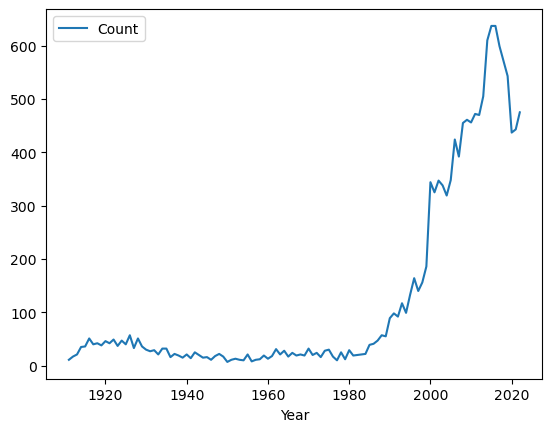

In [27]:
babynames.loc[(babynames.loc[:, 'Name'] == 'Sebastian') & (babynames.loc[:, 'Sex'] == 'M'), :].plot('Year', 'Count')

<a id='section3'></a>
## 3. Adding, Removing, and Modifying Columns
### Add a Column
To add a column, use `.loc[, column-name]` to reference the desired new column, then assign it to a `Series` or `list` of appropriate length. Let's create a new column to the `babynames` `DataFrame` called `"Dummy"` and assigned zeros to it.

In [28]:
babynames.loc[:,  "Dummy"] = 0
babynames

,State,Sex,Year,Name,Count,Dummy
0,NY,F,1910,Mary,1923,0
1,NY,F,1910,Helen,1290,0
2,NY,F,1910,Rose,990,0
3,NY,F,1910,Anna,951,0
4,NY,F,1910,Margaret,926,0
...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,5,0
314089,NY,M,2022,Zeus,5,0
314090,NY,M,2022,Zishe,5,0
314091,NY,M,2022,Zorawar,5,0


Now, let's try creating a new column called `"Count_Squared"` and assign to it the square of the `"Count"` column.

In [29]:
babynames.loc[:,  "Count_Squared"] = babynames.loc[:,  "Count"] * babynames.loc[:,  "Count"]
babynames

,State,Sex,Year,Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,1923,0,3697929
1,NY,F,1910,Helen,1290,0,1664100
2,NY,F,1910,Rose,990,0,980100
3,NY,F,1910,Anna,951,0,904401
4,NY,F,1910,Margaret,926,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,5,0,25
314089,NY,M,2022,Zeus,5,0,25
314090,NY,M,2022,Zishe,5,0,25
314091,NY,M,2022,Zorawar,5,0,25


### Modify a Column
To modify a column, use `.loc[:, column-name]` to access the desired column, then re-assign it to a new `list` or `Series`.

In [30]:
babynames.loc[:, "Count"] = babynames.loc[:, "Count"] - 10000
babynames

,State,Sex,Year,Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,-8077,0,3697929
1,NY,F,1910,Helen,-8710,0,1664100
2,NY,F,1910,Rose,-9010,0,980100
3,NY,F,1910,Anna,-9049,0,904401
4,NY,F,1910,Margaret,-9074,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995,0,25
314089,NY,M,2022,Zeus,-9995,0,25
314090,NY,M,2022,Zishe,-9995,0,25
314091,NY,M,2022,Zorawar,-9995,0,25


### Rename a Column Name
Rename a column using the `.rename(old-column-name:new-column-name)` method.

In [31]:
babynames = babynames.rename(columns={"Name":"First-Name"})
babynames

,State,Sex,Year,First-Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,-8077,0,3697929
1,NY,F,1910,Helen,-8710,0,1664100
2,NY,F,1910,Rose,-9010,0,980100
3,NY,F,1910,Anna,-9049,0,904401
4,NY,F,1910,Margaret,-9074,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995,0,25
314089,NY,M,2022,Zeus,-9995,0,25
314090,NY,M,2022,Zishe,-9995,0,25
314091,NY,M,2022,Zorawar,-9995,0,25


### Delete a Column
Remove a column using `.drop()`.

In [32]:
babynames = babynames.drop(["Dummy", "Count_Squared"], axis="columns")
babynames

,State,Sex,Year,First-Name,Count
0,NY,F,1910,Mary,-8077
1,NY,F,1910,Helen,-8710
2,NY,F,1910,Rose,-9010
3,NY,F,1910,Anna,-9049
4,NY,F,1910,Margaret,-9074
...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995
314089,NY,M,2022,Zeus,-9995
314090,NY,M,2022,Zishe,-9995
314091,NY,M,2022,Zorawar,-9995


<a id='section4'></a>
## 4. Utility Methods
There are many, many utility methods built into `Pandas`, far more than we can possibly cover in `APS106`. You are encouraged to explore all the functionality outlined in the pandas documentation. For `APS106`, you will only be required to know the utility methods covered in this lecture.

In [33]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


### `.max()`
This function returns the maximum value along the specified axis. As shown below, `axis=0` is column-wise and `axis=1` is row-wise.

<br>
<img src="images/DataFrame.png" alt="drawing" width="450"/>
<br>

For a `Series`.
```python
df['column_name'].min()
```

For a `DataFrame`, for column-wise calculation:
```python
df.min(axis=0)
```
or, for a row-wise calculation:
```python
df.min(axis=1)
```

First, let's try calculating the maximum baby name count. As you can see, because `Series` is 1-D data, we do not need to specify the axis.

In [35]:
babynames.loc[:, 'Count'].max()

10027

For a `DataFrame`, if we use a column-wise operation, Pandas will return the maximum value for each column.

In [36]:
babynames.max(axis=0)

State       NY
Sex          M
Year      2022
Name      Zyra
Count    10027
dtype: object

If we use a row-wise operation, Pandas will try to return the maximum value for each row.

In [37]:
babynames.max(axis=1)

TypeError: '>=' not supported between instances of 'str' and 'int'

As you can see, we get an error because Pandas cannot compare numberic and string data to determine which is larger. If we filter to only the numeric columns (`"Year"` and `"Count"`), then this should work. You can see that the `"Year"` is returned because its typically larger than the name count.

In [38]:
babynames.loc[:, ['Year', 'Count']].max(axis=1)

0         1923
1         1910
2         1910
3         1910
4         1910
          ... 
314088    2022
314089    2022
314090    2022
314091    2022
314092    2022
Length: 314093, dtype: int64

### `.min()`
This function returns the minimum value along the specified axis.

In [39]:
babynames.loc[:, ['Year', 'Count']].min(axis=1)

0         1910
1         1290
2          990
3          951
4          926
          ... 
314088       5
314089       5
314090       5
314091       5
314092       5
Length: 314093, dtype: int64

### `.mean()`
This function computes the arithmetic mean along the specified axis.

In [40]:
babynames.loc[:, 'Count'].mean()

80.66585692772523

### `.value_counts()`
Count the number of times each unique value occurs in a `Series`. The output below is a `Series` where the `index` are all the unique names in the `babynames` `DataFrame` and the `values` are the total number of babies with those names.

In [ ]:
babynames.loc[:, "Name"].value_counts()

### `.unique()`
Return an array of all unique values in a `Series`. Below, we apply the `.unique()` method to the `Name` `Series` and get an array of all unique baby names in the `babynames` dataset. For the purpose of `APS106`, you can treat this array as a list-like object. It is mutable, indexable, and iterable. 

In [ ]:
babynames.loc[:, "Name"].unique()

### `.sort_values()`
The `.sort_values()` function in `Pandas` is used to sort a `DataFrame` or `Series` by one or more columns. It allows you to specify the column(s) by which you want to sort the data, as well as the order of sorting (ascending or descending).

The code below sorts the `Name` `Series` in ascending order.

In [ ]:
babynames.loc[:, "Name"].sort_values()

The code below sorts a `DataFrame` by the `Count` column in descending order.

In [ ]:
babynames.sort_values(by=["Count"], ascending=[False]).head()

The code below sorts a `DataFrame` first by the `"Year"` in ascending order and then by the `"Count"` in descending order.

In [ ]:
babynames.sort_values(by=["Year", "Count"], ascending=[True, False]).head()

<a id='section5'></a>
## 5. String Methods
The Pandas library is very useful for the manipulation of strings as it provides us with various handy string methods. It saves time and makes our program efficient. The following are `string` methods we will cover in APS106.
1. `.upper()`
2. `.lower()`
3. `.len()`
4. `.startswith()`
5. `.replace()`

### `.upper()`
This `string` method converts a `string` into uppercase as you can see from the example below.

In [44]:
babynames.loc[:, 'Name'].str.upper()

0             MARY
1            HELEN
2             ROSE
3             ANNA
4         MARGARET
            ...   
314088      ZEPHYR
314089        ZEUS
314090       ZISHE
314091     ZORAWAR
314092      ZUBAIR
Name: Name, Length: 314093, dtype: object

`string` method opperator on `Series` NOT `DataFrames`. Notice the error when I try to call a `string` method from a `DataFrame`.

In [45]:
babynames.str.upper()

AttributeError: 'DataFrame' object has no attribute 'str'

Additionally, we need to access `string` methods via the `.str` module. 

1. `Series.str.upper()`
2. `Series.str.lower()`
3. `Series.str.len()`
4. `Series.str.startswith()`
5. `Series.str.replace()`

### `.lower()`

### `.len()`

### `.startswith()`

### `.replace()`

<a id='section6'></a>
## 6. Concatenation
In the lecture folder, there are six `.csv` files from **Uber** showing monthly ridership numbers from April 2014 to September 2014.

Given what we've learned aleady in Lectures 12.1, we know how to import these `.csv` files to **Pandas** `DataFrames`. Lets try that.

In [ ]:
april_data = pd.read_csv('uber-raw-data-apr14.csv')
may_data = pd.read_csv('uber-raw-data-may14.csv')
june_data = pd.read_csv('uber-raw-data-jun14.csv')
july_data = pd.read_csv('uber-raw-data-jul14.csv')
aug_data = pd.read_csv('uber-raw-data-aug14.csv')
sept_data = pd.read_csv('uber-raw-data-sep14.csv')

Let's see what the April data looks like.

In [ ]:
april_data.head()

In this `DataFrame`, each row is an Uber trip

Suppose we're asked to plot the number of trips per hour from April 2014 to September 2014. To tackle this problem, it would be much easier if all the data was in one `DataFrame`.

In the following section, you'll be introduces to one of two Pandas methods for combining DataFrames: `.concatenate()`. There is another called `.merge()`, which is beyond the scope of APS106. The figure below is helpful for figuring out which method to use. Again, eveything on the right branch is beyond the scope of APS106.

<br>
<img src="images/merging_dataframes.png" alt="drawing" width="750"/>
<br>

### Concatenate

We use the `.concat()` function to append either columns or rows from one DataFrame to another. This happens to be the functionality we need to handle the Uber data we import above.

[`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) has many features, which you're encouraged to explore, but the basic function is demonstrated below.

If we look at the flow diagram above, if we want to stack multiple DataFrames side-by-side, then we set `axis=1`.

In [ ]:
# Stack the DataFrames on top of each other
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], axis=1)

# View combined DataFrame
uber_data.head()

However, this is not what we want to do with the Uber data. We'd like to stack the data from each month, one on top of each other from April to September. To accomplish this, we need to set `axis=0`. Note that the order of the months in the DataFrame (top to bottom) follows the order of months in the `.concat()` method, left to right.

In [ ]:
# Stack the DataFrames on top of each other
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], axis=0)

# View combined DataFrame
uber_data.head()

We can see April data dat the top of the DataFrame

In [ ]:
uber_data.tail()

and September data at the bottom.

Next, let's plot the index of our new DataFrame `uber_data` and inspect.

In [ ]:
import matplotlib.pylab as plt
plt.plot(uber_data.index)
plt.show()

We can clearly see from the plot that when concatenating the DataFrames, the original indexes have been preserved, meaning that we have duplicates, which will be an issue moving forward. 

To adjust the row index automatically, we have to set the argument `ignore_index` as `True` while calling the `.concat()` function.

In [ ]:
uber_data = pd.concat([april_data, 
                       may_data, 
                       june_data, 
                       july_data, 
                       aug_data, 
                       sept_data], 
                      axis=0,
                      ignore_index=True)

plt.plot(uber_data.index)
plt.show()

Now each row has a unique index!

The `.concat()` function has many more features that you should definitely [check out](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [ ]:
uber_data = pd.read_csv('uber-raw-data-jun14.csv')
uber_data = uber_data.set_index('Date/Time')
uber_data.index = pd.DatetimeIndex(uber_data.index)
counts = uber_data.index.value_counts().resample('H').sum()

<a id='section7'></a>
## 7. Breakout Session 2
Let's create a `Node`.

<a id='section8'></a>
## 8. Data Visualization
Let's create a `Node`.